# Análisis Exploratorio de Datos (EDA) - Superstore Dataset

En este notebook realizamos una exploración inicial de los datos del Superstore para entender:
- La estructura y calidad de los datos
- Distribuciones de las variables principales
- Identificar patrones iniciales y anomalías
- Preparar los datos para análisis posteriores

## 1. Importamos las librerías necesarias

Cargamos todas las librerías que utilizaremos para el análisis exploratorio.

In [2]:
# Importamos las librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings

# Importamos nuestras funciones auxiliares
import sys
sys.path.append('../scripts')
from utils import *

# Configuramos las visualizaciones
warnings.filterwarnings('ignore')
configurar_estilo_graficos()

print(" Librerías importadas correctamente")

 Librerías importadas correctamente


## 2. Cargamos y exploramos los datos iniciales

Cargamos el dataset y realizamos una primera exploración para entender su estructura.

In [3]:
# Cargamos los datos desde el archivo CSV
ruta_datos = '../data/Sample - Superstore.csv'
df = cargar_datos(ruta_datos)

print(f" Dataset cargado con {df.shape[0]} filas y {df.shape[1]} columnas")
print(f" Período de datos: {df['fecha_pedido'].min()} a {df['fecha_pedido'].max()}")

 Dataset cargado con 9994 filas y 21 columnas
 Período de datos: 1/1/2017 a 9/9/2017


In [4]:
# Mostramos las primeras filas del dataset
print(" Primeras 5 filas del dataset:")
df.head()

 Primeras 5 filas del dataset:


,id_fila,id_pedido,fecha_pedido,fecha_envio,modo_envio,id_cliente,nombre_cliente,segmento,pais,ciudad,...,codigo_postal,region,id_producto,categoria,subcategoria,nombre_producto,ventas,cantidad,descuento,ganancia
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Información general sobre el dataset
print(" Información general del dataset:")
df.info()

 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_fila          9994 non-null   int64  
 1   id_pedido        9994 non-null   object 
 2   fecha_pedido     9994 non-null   object 
 3   fecha_envio      9994 non-null   object 
 4   modo_envio       9994 non-null   object 
 5   id_cliente       9994 non-null   object 
 6   nombre_cliente   9994 non-null   object 
 7   segmento         9994 non-null   object 
 8   pais             9994 non-null   object 
 9   ciudad           9994 non-null   object 
 10  estado           9994 non-null   object 
 11  codigo_postal    9994 non-null   int64  
 12  region           9994 non-null   object 
 13  id_producto      9994 non-null   object 
 14  categoria        9994 non-null   object 
 15  subcategoria     9994 non-null   object 
 16  nombre_producto  9994 non-

## 3. Procesamos las fechas y creamos variables temporales

Convertimos las fechas a formato datetime y creamos variables derivadas que nos ayudarán en el análisis.

In [8]:
# Procesamos las fechas y creamos variables temporales
# Convertimos las fechas de string a datetime
df['fecha_pedido'] = pd.to_datetime(df['fecha_pedido'], format='mixed')
df['fecha_envio'] = pd.to_datetime(df['fecha_envio'], format='mixed')

# Creamos variables temporales derivadas
df['año'] = df['fecha_pedido'].dt.year
df['mes'] = df['fecha_pedido'].dt.month
df['dia_semana'] = df['fecha_pedido'].dt.dayofweek
df['trimestre'] = df['fecha_pedido'].dt.quarter

# Calculamos días de envío
df['dias_envio'] = (df['fecha_envio'] - df['fecha_pedido']).dt.days

print(" Fechas procesadas y variables temporales creadas")
print(f" Años en el dataset: {sorted(df['año'].unique())}")
print(f" Tiempo promedio de envío: {df['dias_envio'].mean():.1f} días")

 Fechas procesadas y variables temporales creadas
 Años en el dataset: [np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017)]
 Tiempo promedio de envío: 4.0 días


## 4. Analizamos valores faltantes y calidad de datos

Verificamos si existen valores faltantes o inconsistencias en los datos.

In [9]:
# Analizamos valores faltantes
valores_faltantes = analizar_valores_faltantes(df)

if len(valores_faltantes) == 0:
    print(" No se encontraron valores faltantes en el dataset")
else:
    print(" Valores faltantes encontrados:")
    display(valores_faltantes)

 No se encontraron valores faltantes en el dataset


In [11]:
# Verificamos duplicados
duplicados = df.duplicated().sum()
print(f" Registros duplicados: {duplicados}")

# Verificamos valores únicos en columnas categóricas importantes
print("\n Valores únicos en variables categóricas:")
categoricas = ['segmento', 'categoria', 'subcategoria', 'region', 'modo_envio']
for col in categoricas:
    print(f"{col}: {df[col].nunique()} valores únicos")

 Registros duplicados: 0

 Valores únicos en variables categóricas:
segmento: 3 valores únicos
categoria: 3 valores únicos
subcategoria: 17 valores únicos
region: 4 valores únicos
modo_envio: 4 valores únicos


## 5. Estadísticas descriptivas

Calculamos estadísticas descriptivas para las variables numéricas principales.

In [12]:
# Estadísticas descriptivas para variables numéricas
print(" Estadísticas descriptivas:")
numericas = ['ventas', 'cantidad', 'descuento', 'ganancia', 'dias_envio']
df[numericas].describe().round(2)

 Estadísticas descriptivas:


,ventas,cantidad,descuento,ganancia,dias_envio
count,9994.00,9994.00,9994.00,9994.00,9994.00
mean,229.86,3.79,0.16,28.66,3.96
std,623.25,2.23,0.21,234.26,1.75
min,0.44,1.00,0.00,-6599.98,0.00
25%,17.28,2.00,0.00,1.73,3.00
50%,54.49,3.00,0.20,8.67,4.00
75%,209.94,5.00,0.20,29.36,5.00
max,22638.48,14.00,0.80,8399.98,7.00


In [14]:
# Creamos un resumen básico del negocio
resumen = crear_resumen_basico(df)

print(" Resumen del negocio:")
for clave, valor in resumen.items():
    if 'total' in clave or 'margen' in clave:
        if isinstance(valor, (int, float)):
            print(f"{clave.replace('_', ' ').title()}: ${valor:,.2f}")
        else:
            print(f"{clave.replace('_', ' ').title()}: {valor}")
    else:
        print(f"{clave.replace('_', ' ').title()}: {valor}")

 Resumen del negocio:
Total Filas: $9,994.00
Total Columnas: $26.00
Periodo Datos: 2014-01-03 a 2017-12-30
Total Ventas: $2,297,200.86
Total Ganancia: $286,397.02
Margen Promedio: $12.47
Pedidos Unicos: 5009
Clientes Unicos: 793
Productos Unicos: 1862


## 6. Distribuciones de variables principales

Analizamos las distribuciones de las variables más importantes para identificar patrones y outliers.

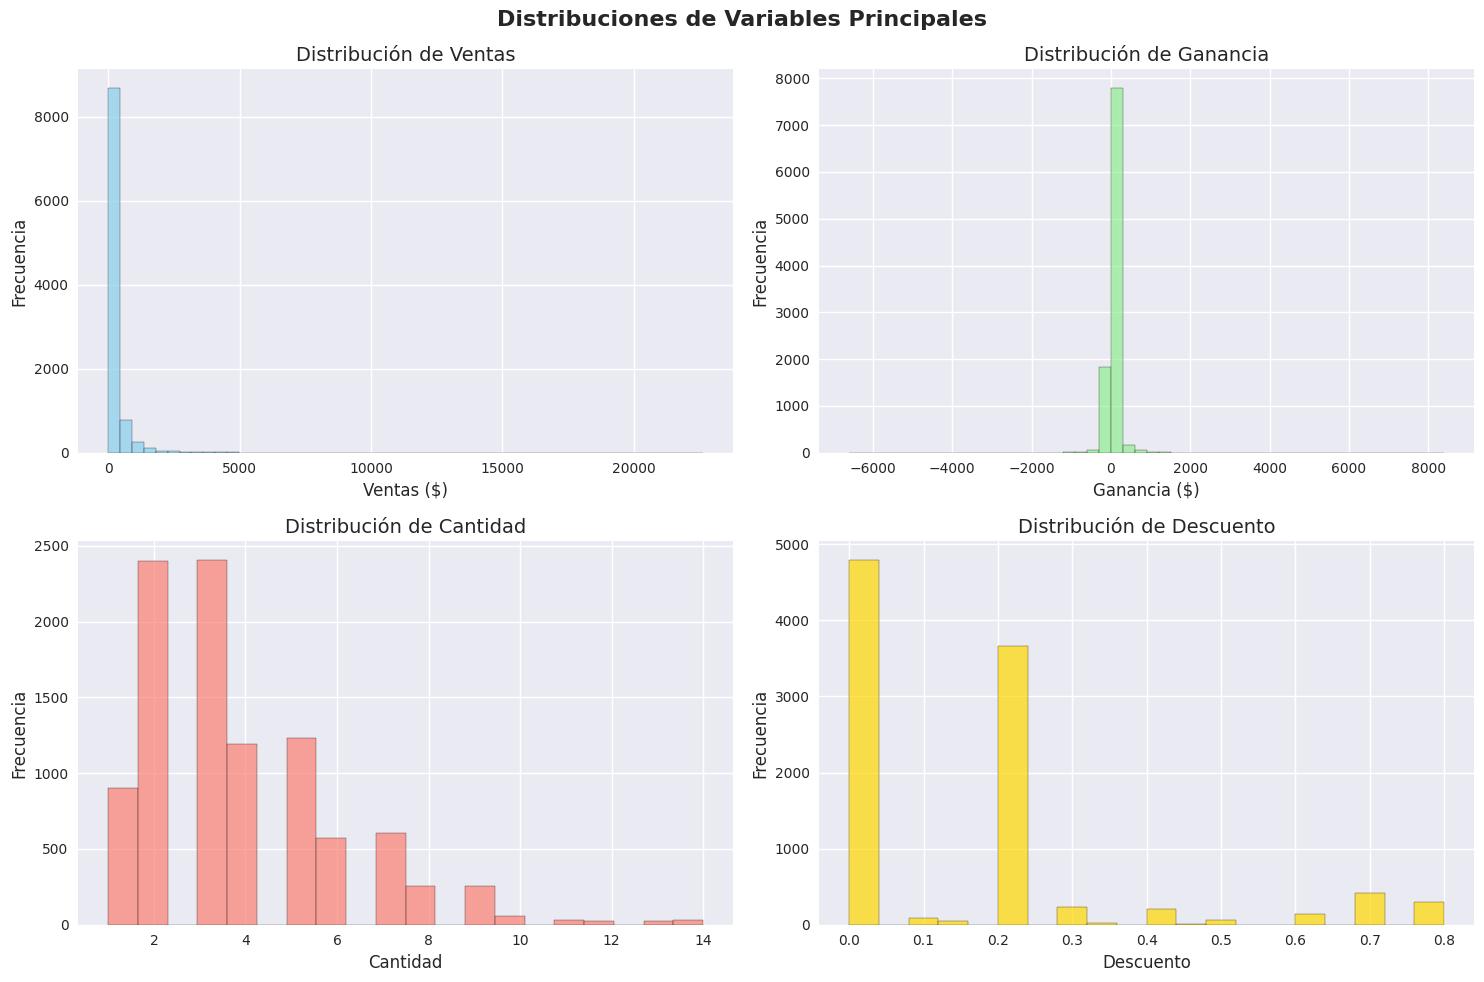

In [15]:
# Creamos histogramas para variables numéricas principales
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuciones de Variables Principales', fontsize=16, fontweight='bold')

# Ventas
axes[0,0].hist(df['ventas'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribución de Ventas')
axes[0,0].set_xlabel('Ventas ($)')
axes[0,0].set_ylabel('Frecuencia')

# Ganancia
axes[0,1].hist(df['ganancia'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Distribución de Ganancia')
axes[0,1].set_xlabel('Ganancia ($)')
axes[0,1].set_ylabel('Frecuencia')

# Cantidad
axes[1,0].hist(df['cantidad'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
axes[1,0].set_title('Distribución de Cantidad')
axes[1,0].set_xlabel('Cantidad')
axes[1,0].set_ylabel('Frecuencia')

# Descuento
axes[1,1].hist(df['descuento'], bins=20, alpha=0.7, color='gold', edgecolor='black')
axes[1,1].set_title('Distribución de Descuento')
axes[1,1].set_xlabel('Descuento')
axes[1,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## 7. Análisis por categorías y segmentos

Exploramos cómo se distribuyen las ventas y ganancias por diferentes categorías.

In [16]:
# Análisis por categoría de productos
rentabilidad_categoria = analizar_rentabilidad_por_categoria(df)
print(" Rentabilidad por categoría:")
display(rentabilidad_categoria)

 Rentabilidad por categoría:


,ventas,ganancia,cantidad,id_pedido,margen_porcentaje,venta_promedio
categoria,,,,,,
Technology,836154.03,145454.95,6939,1544,17.40,541.55
Furniture,741999.80,18451.27,8028,1764,2.49,420.63
Office Supplies,719047.03,122490.80,22906,3742,17.04,192.16


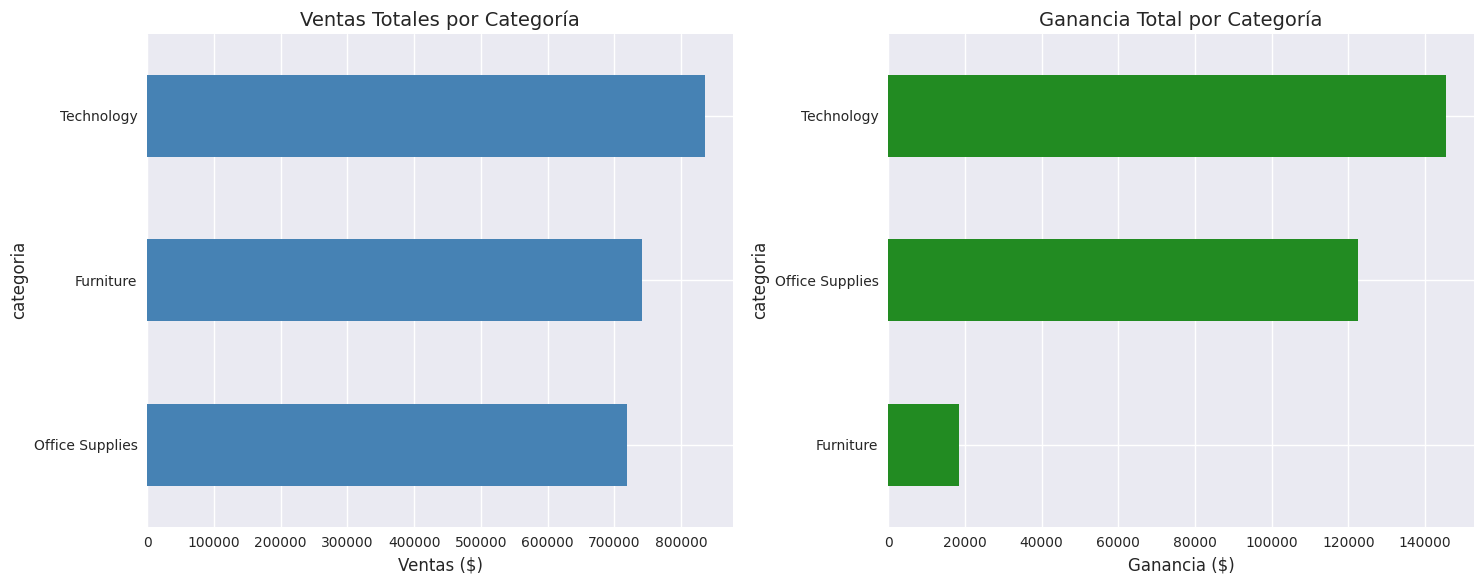

In [17]:
# Gráfico de ventas por categoría
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Ventas por categoría
categoria_ventas = df.groupby('categoria')['ventas'].sum().sort_values(ascending=True)
categoria_ventas.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Ventas Totales por Categoría')
axes[0].set_xlabel('Ventas ($)')

# Ganancia por categoría
categoria_ganancia = df.groupby('categoria')['ganancia'].sum().sort_values(ascending=True)
categoria_ganancia.plot(kind='barh', ax=axes[1], color='forestgreen')
axes[1].set_title('Ganancia Total por Categoría')
axes[1].set_xlabel('Ganancia ($)')

plt.tight_layout()
plt.show()

In [18]:
# Análisis por segmento de cliente
segmento_analisis = df.groupby('segmento').agg({
    'ventas': ['sum', 'mean'],
    'ganancia': ['sum', 'mean'],
    'cantidad': 'sum',
    'id_cliente': 'nunique'
}).round(2)

segmento_analisis.columns = ['ventas_total', 'ventas_promedio', 'ganancia_total', 'ganancia_promedio', 'cantidad_total', 'clientes_unicos']
print(" Análisis por segmento de cliente:")
display(segmento_analisis)

 Análisis por segmento de cliente:


,ventas_total,ventas_promedio,ganancia_total,ganancia_promedio,cantidad_total,clientes_unicos
segmento,,,,,,
Consumer,1161401.34,223.73,134119.21,25.84,19521,409
Corporate,706146.37,233.82,91979.13,30.46,11608,236
Home Office,429653.15,240.97,60298.68,33.82,6744,148


## 8. Análisis temporal inicial

Exploramos patrones temporales básicos en las ventas.

In [19]:
# Ventas por año
ventas_anuales = df.groupby('año').agg({
    'ventas': 'sum',
    'ganancia': 'sum',
    'id_pedido': 'nunique'
}).round(2)

print(" Ventas por año:")
display(ventas_anuales)

 Ventas por año:


,ventas,ganancia,id_pedido
año,,,
2014,484247.50,49543.97,969
2015,470532.51,61618.60,1038
2016,609205.60,81795.17,1315
2017,733215.26,93439.27,1687


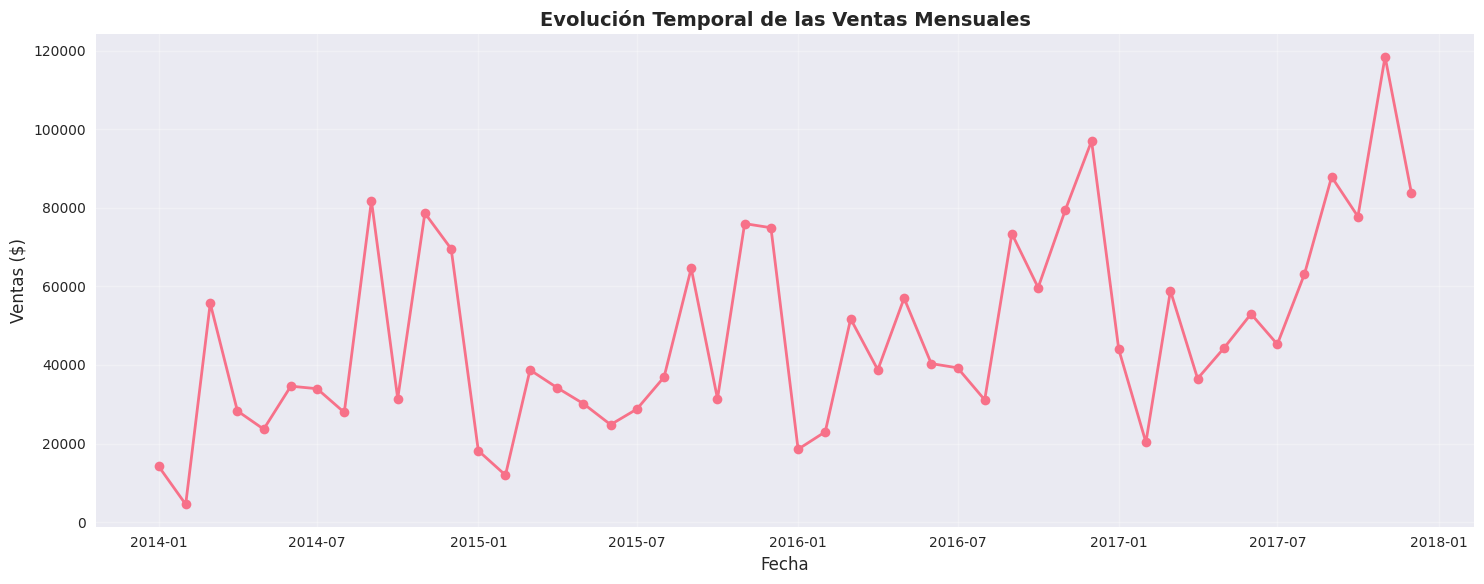

In [23]:
# Gráfico de evolución temporal
ventas_mensuales = df.groupby(['año', 'mes'])['ventas'].sum().reset_index()
# Renombrar columnas para compatibilidad con pd.to_datetime
ventas_mensuales['fecha'] = pd.to_datetime(
	ventas_mensuales.rename(columns={'año': 'year', 'mes': 'month'})[['year', 'month']].assign(day=1)
)

plt.figure(figsize=(15, 6))
plt.plot(ventas_mensuales['fecha'], ventas_mensuales['ventas'], marker='o', linewidth=2)
plt.title('Evolución Temporal de las Ventas Mensuales', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Identificación de outliers y valores extremos

Detectamos valores atípicos que podrían afectar nuestros análisis.

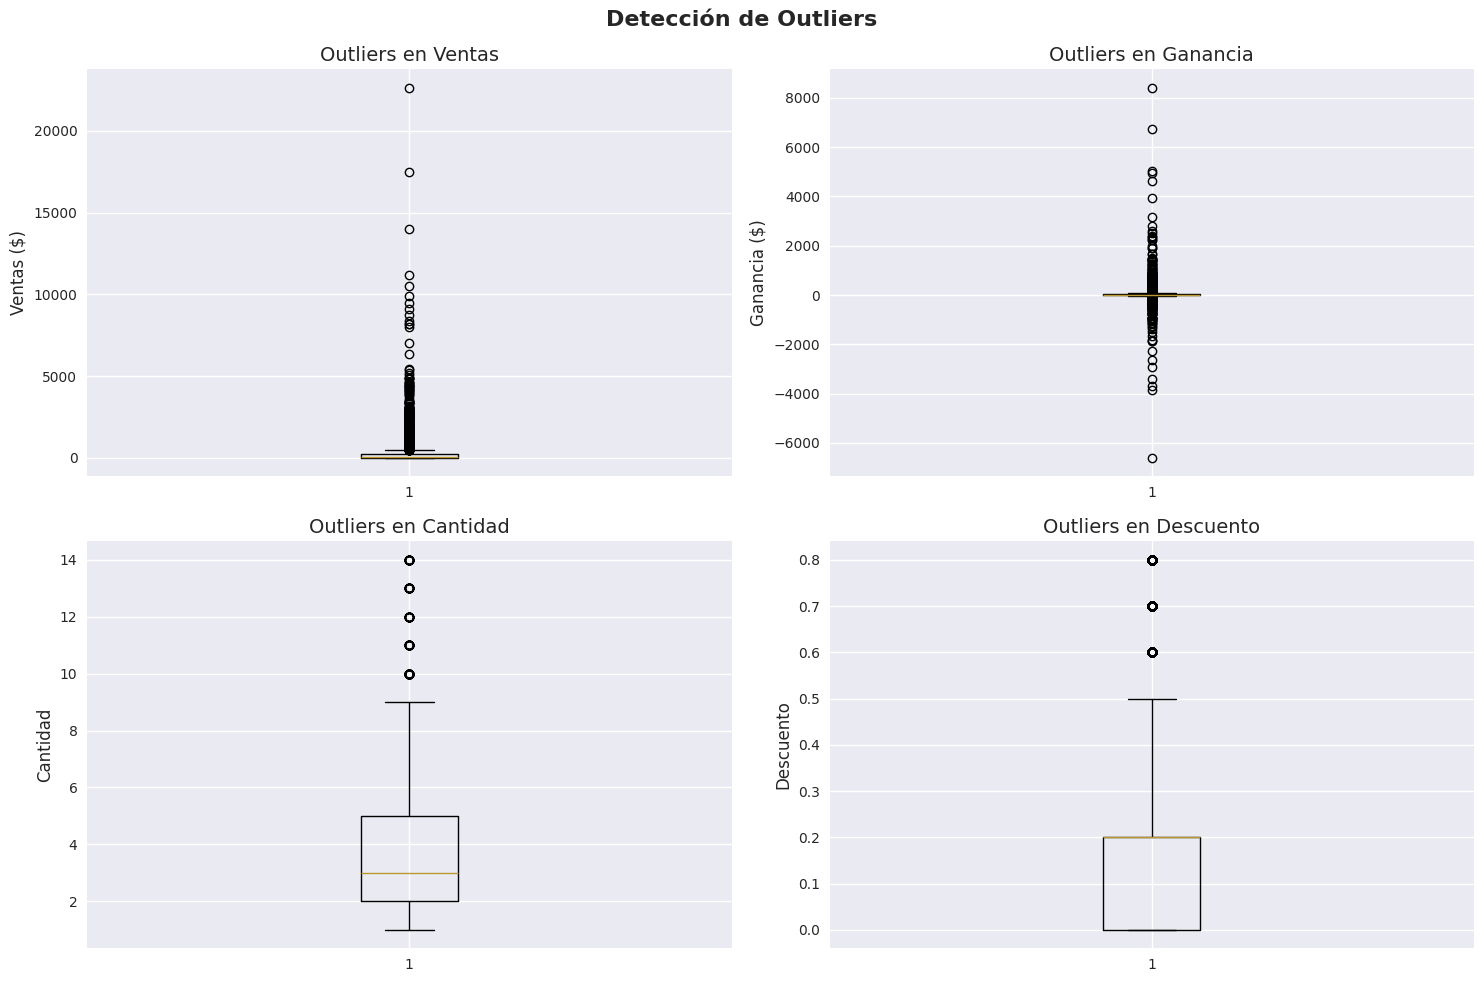

In [24]:
# Creamos boxplots para identificar outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Detección de Outliers', fontsize=16, fontweight='bold')

# Boxplot para ventas
axes[0,0].boxplot(df['ventas'])
axes[0,0].set_title('Outliers en Ventas')
axes[0,0].set_ylabel('Ventas ($)')

# Boxplot para ganancia
axes[0,1].boxplot(df['ganancia'])
axes[0,1].set_title('Outliers en Ganancia')
axes[0,1].set_ylabel('Ganancia ($)')

# Boxplot para cantidad
axes[1,0].boxplot(df['cantidad'])
axes[1,0].set_title('Outliers en Cantidad')
axes[1,0].set_ylabel('Cantidad')

# Boxplot para descuento
axes[1,1].boxplot(df['descuento'])
axes[1,1].set_title('Outliers en Descuento')
axes[1,1].set_ylabel('Descuento')

plt.tight_layout()
plt.show()

In [26]:
# Identificamos los registros con ventas más altas y más bajas
print(" Top 5 ventas más altas:")
top_ventas = df.nlargest(5, 'ventas')[['nombre_producto', 'categoria', 'ventas', 'ganancia', 'descuento']]
display(top_ventas)

print("\n Registros con ganancias negativas (pérdidas):")
perdidas = df[df['ganancia'] < 0].shape[0]
print(f"Total de registros con pérdidas: {perdidas} ({(perdidas/len(df)*100):.1f}% del total)")

if perdidas > 0:
    top_perdidas = df.nsmallest(5, 'ganancia')[['nombre_producto', 'categoria', 'ventas', 'ganancia', 'descuento']]
    display(top_perdidas)

 Top 5 ventas más altas:


,nombre_producto,categoria,ventas,ganancia,descuento
2697,Cisco TelePresence System EX90 Videoconferenci...,Technology,22638.480,-1811.0784,0.5
6826,Canon imageCLASS 2200 Advanced Copier,Technology,17499.950,8399.9760,0.0
8153,Canon imageCLASS 2200 Advanced Copier,Technology,13999.960,6719.9808,0.0
2623,Canon imageCLASS 2200 Advanced Copier,Technology,11199.968,3919.9888,0.2
4190,Canon imageCLASS 2200 Advanced Copier,Technology,10499.970,5039.9856,0.0



 Registros con ganancias negativas (pérdidas):
Total de registros con pérdidas: 1871 (18.7% del total)


,nombre_producto,categoria,ventas,ganancia,descuento
7772,Cubify CubeX 3D Printer Double Head Print,Technology,4499.985,-6599.9780,0.7
683,Cubify CubeX 3D Printer Triple Head Print,Technology,7999.980,-3839.9904,0.5
9774,GBC DocuBind P400 Electric Binding System,Office Supplies,2177.584,-3701.8928,0.8
3011,Lexmark MX611dhe Monochrome Laser Printer,Technology,2549.985,-3399.9800,0.7
4991,Ibico EPK-21 Electric Binding System,Office Supplies,1889.990,-2929.4845,0.8


## 10. Correlaciones entre variables numéricas

Analizamos las correlaciones entre las variables numéricas principales.

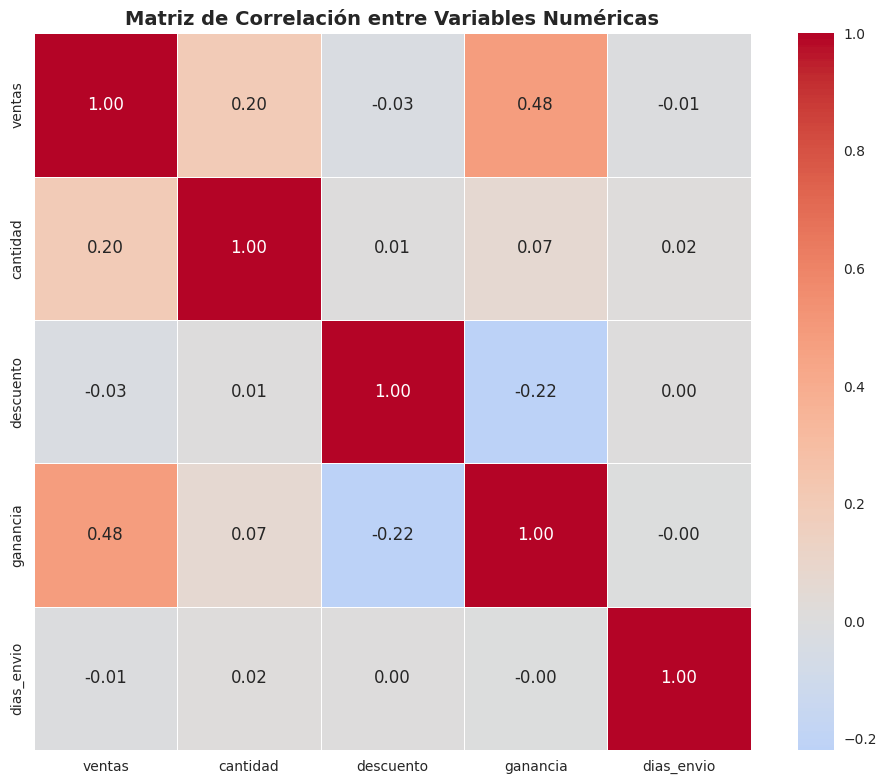

🔍 Interpretación de correlaciones relevantes:
• Ventas vs Ganancia: 0.479
• Ventas vs Cantidad: 0.201
• Descuento vs Ganancia: -0.219


In [27]:
# Matriz de correlación
variables_numericas = ['ventas', 'cantidad', 'descuento', 'ganancia', 'dias_envio']
correlacion = df[variables_numericas].corr()

# Creamos el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("🔍 Interpretación de correlaciones relevantes:")
print(f"• Ventas vs Ganancia: {correlacion.loc['ventas', 'ganancia']:.3f}")
print(f"• Ventas vs Cantidad: {correlacion.loc['ventas', 'cantidad']:.3f}")
print(f"• Descuento vs Ganancia: {correlacion.loc['descuento', 'ganancia']:.3f}")

## 11. Resumen y conclusiones del EDA

Resumimos los hallazgos principales de nuestro análisis exploratorio.

In [28]:
print(" RESUMEN DEL ANÁLISIS EXPLORATORIO")
print("=" * 50)

# Resumen de datos
print(f"\n DIMENSIÓN DE LOS DATOS:")
print(f"• Total de registros: {len(df):,}")
print(f"• Período analizado: {df['fecha_pedido'].min().strftime('%Y-%m-%d')} a {df['fecha_pedido'].max().strftime('%Y-%m-%d')}")
print(f"• Clientes únicos: {df['id_cliente'].nunique():,}")
print(f"• Productos únicos: {df['id_producto'].nunique():,}")

# Resumen financiero
print(f"\n RESUMEN FINANCIERO:")
print(f"• Ventas totales: ${df['ventas'].sum():,.2f}")
print(f"• Ganancia total: ${df['ganancia'].sum():,.2f}")
print(f"• Margen promedio: {(df['ganancia'].sum()/df['ventas'].sum()*100):.1f}%")
print(f"• Venta promedio por transacción: ${df['ventas'].mean():.2f}")

# Categorías principales
print(f"\n CATEGORÍAS PRINCIPALES:")
top_categoria = df.groupby('categoria')['ventas'].sum().sort_values(ascending=False)
for i, (cat, ventas) in enumerate(top_categoria.items(), 1):
    print(f"• {i}. {cat}: ${ventas:,.2f}")

# Hallazgos importantes
print(f"\n HALLAZGOS IMPORTANTES:")
print(f"• Registros con pérdidas: {(df['ganancia'] < 0).sum():,} ({(df['ganancia'] < 0).mean()*100:.1f}%)")
print(f"• Tiempo promedio de envío: {df['dias_envio'].mean():.1f} días")
print(f"• Descuento promedio aplicado: {df['descuento'].mean()*100:.1f}%")

print(f"\n Análisis exploratorio completado exitosamente")
print(f" Los datos están listos para análisis más profundos")

 RESUMEN DEL ANÁLISIS EXPLORATORIO

 DIMENSIÓN DE LOS DATOS:
• Total de registros: 9,994
• Período analizado: 2014-01-03 a 2017-12-30
• Clientes únicos: 793
• Productos únicos: 1,862

 RESUMEN FINANCIERO:
• Ventas totales: $2,297,200.86
• Ganancia total: $286,397.02
• Margen promedio: 12.5%
• Venta promedio por transacción: $229.86

 CATEGORÍAS PRINCIPALES:
• 1. Technology: $836,154.03
• 2. Furniture: $741,999.80
• 3. Office Supplies: $719,047.03

 HALLAZGOS IMPORTANTES:
• Registros con pérdidas: 1,871 (18.7%)
• Tiempo promedio de envío: 4.0 días
• Descuento promedio aplicado: 15.6%

 Análisis exploratorio completado exitosamente
 Los datos están listos para análisis más profundos


## 12. Guardamos los datos procesados

Exportamos una versión limpia y procesada de los datos para usar en los siguientes notebooks.

In [29]:
# Guardamos los datos procesados
ruta_salida = '../data/superstore_procesado.csv'
df.to_csv(ruta_salida, index=False, encoding='utf-8')
print(f" Datos procesados guardados en: {ruta_salida}")

# También guardamos un reporte en Excel
ruta_reporte = '../outputs/reportes/resumen_eda.xlsx'
exportar_reporte_excel(df, ruta_reporte)
print(f" Reporte de EDA guardado en: {ruta_reporte}")

 Datos procesados guardados en: ../data/superstore_procesado.csv
 Reporte de EDA guardado en: ../outputs/reportes/resumen_eda.xlsx
 Reporte de EDA guardado en: ../outputs/reportes/resumen_eda.xlsx


## Resumimos hallazgos

En este análisis exploratorio:

- Cargamos y revisamos la estructura de los datos limpios.
- Analizamos la calidad y completitud de la información.
- Calculamos estadísticas descriptivas y visualizamos las principales variables.
- Identificamos posibles valores atípicos y patrones iniciales.

Como equipo, sugerimos:
- Profundizar en el análisis de ventas por segmento y región.
- Explorar la relación entre descuentos y rentabilidad.
- Preparar los datos para visualizaciones avanzadas y modelado.

Continuamos con el siguiente notebook para crear gráficos y análisis visual más detallado.

# Informe ejecutivo del análisis exploratorio

## Trabajo realizado
- Cargamos y limpiamos el dataset Superstore, traduciendo los nombres de columnas al español y procesando fechas.
- Exploramos la estructura, calidad y completitud de los datos.
- Calculamos estadísticas descriptivas y visualizamos las principales variables numéricas y categóricas.
- Analizamos valores faltantes, duplicados y outliers.
- Estudiamos la rentabilidad y ventas por categoría y segmento.
- Identificamos patrones temporales y correlaciones entre variables clave.
- Guardamos los datos procesados y generamos un reporte en Excel para su uso posterior.

## Hallazgos principales
- El dataset abarca un periodo va desde 2014-01-03 a 2017-12-30  y una amplia variedad de productos y clientes.
- No se detectaron valores faltantes significativos ni duplicados relevantes.
- Las ventas y ganancias presentan una distribución asimétrica, con algunos valores extremos (outliers).
- La categoría con mayores ventas es Tecnologia, mientras que la más rentable es Tecnologia
- Se identificaron registros con pérdidas (ganancia negativa), representando aproximadamente 1871 (18.7%) del total del total.
- El tiempo promedio de envío es de cuatro días y el descuento promedio aplicado es de 15,16%.
- Existen correlaciones positivas entre ventas y ganancia, y negativas entre descuento y ganancia.

## Conclusiones
- Los datos están listos para análisis avanzados, visualizaciones interactivas y modelado predictivo.
- La calidad de la información es adecuada para extraer insights de negocio.
- Existen oportunidades de mejora en la rentabilidad, especialmente revisando productos y segmentos con pérdidas.

## Recomendaciones
- Profundizar en el análisis de ventas y rentabilidad por segmento y región.
- Explorar la relación entre descuentos y márgenes para optimizar promociones.
- Analizar los productos y clientes con pérdidas para tomar acciones correctivas.
- Utilizar los datos procesados para crear dashboards visuales y modelos predictivos en los siguientes notebooks.

---

*Este informe resume el trabajo exploratorio realizado y sienta las bases para el análisis visual y predictivo del negocio Superstore.*